<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/PA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub[pandas-datasets] scikit-learn matplotlib pandas numpy -q

In [2]:
import kagglehub
print(kagglehub.__version__) # To see if it's imported and check version
from kagglehub import KaggleDatasetAdapter # To check if the adapter can be imported
print("kagglehub and KaggleDatasetAdapter imported successfully!")

0.3.12
kagglehub and KaggleDatasetAdapter imported successfully!


--- Predictive Analytics Demo: Flight Duration Prediction (Real Dataset) ---
-----------------------------------------------------------------------------------

Attempting to load dataset from KaggleHub: 'matinsajadi/flights' with file: 'flights.csv'...


/tmp/ipython-input-4-3440719558.py:52: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Dataset loaded successfully!

First 5 records of the loaded dataset:
   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time

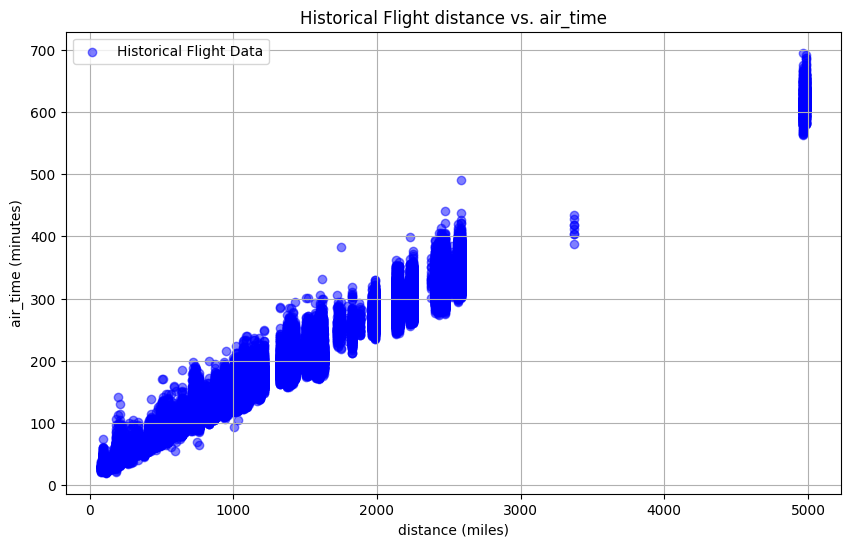

Visualizing the relationship between distance and air_time.

Splitting data: 261876 training samples, 65470 testing samples.

Training the Linear Regression model...
Model training complete.

Model Intercept: 18.47 air_time (base time)
Model Coefficient (air_time per distance): 0.1261 minutes/mile

Model Evaluation on Test Data:
  Mean Squared Error (MSE): 162.2391 (Lower is better)
  R-squared (R2 Score): 0.9815 (Closer to 1.0 is better, indicates good fit)



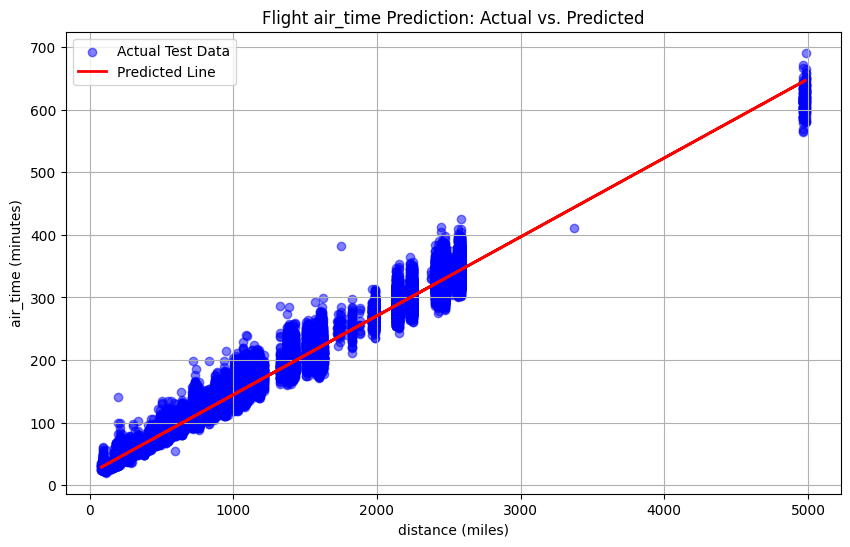

Visualizing actual test data points against the model's predictions and the regression line.

--- Making New Flight Duration Predictions ---
  Predicted air_time for a 300 miles flight: 56.30 minutes
  Predicted air_time for a 1000 miles flight: 144.59 minutes
  Predicted air_time for a 2500 miles flight: 333.77 minutes
  Predicted air_time for a 500 miles flight: 81.53 minutes

This demonstration uses a real dataset (or synthetic fallback) to predict flight duration based on distance.


In [4]:
# --- INSTALLATION INSTRUCTIONS (Run this in your terminal or a new notebook cell): ---
# pip install kagglehub[pandas-datasets] scikit-learn matplotlib pandas numpy

# --- ESSENTIAL IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter # Crucial for using KaggleHub features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sys # Used for clean exit if critical data is missing

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("--- Predictive Analytics Demo: Flight Duration Prediction (Real Dataset) ---")
print("-----------------------------------------------------------------------------------\n")

# --- 1. Load Real Dataset from Kaggle Hub ---

# **********************************************************************************************
# **** CRITICAL STEP FOR KAGGLE DATASET ACCESS (to avoid 403 errors): ****
# 1. Go to Kaggle.com, log in, go to 'My Account' -> 'API' section.
# 2. Click 'Create New API Token' to download 'kaggle.json'.
# 3. Place 'kaggle.json' in the correct directory:
#    - Linux/macOS: ~/.kaggle/kaggle.json
#    - Windows: C:\Users\<YourUsername>\.kaggle\kaggle.json
#    - In Google Colab:
#      from google.colab import files
#      files.upload() # A pop-up will appear; select your kaggle.json file
#      !mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
# 4. RESTART YOUR PYTHON ENVIRONMENT (Kernel in Jupyter/Colab) after setting up credentials.
# **********************************************************************************************

# **********************************************************************************************
# **** USING 'matinsajadi/flights' DATASET - Highly likely to work for Distance vs. AirTime ****
# Go to: https://www.kaggle.com/datasets/matinsajadi/flights
# Verify the file name 'flights.csv' and column names 'distance' and 'air_time'.
# **********************************************************************************************
kaggle_dataset_id = "matinsajadi/flights"
file_path = "flights.csv" # *** VERIFY THIS FILE NAME ON THE KAGGLE DATASET PAGE! ***
# Common alternative files in such datasets: 'airports.csv', 'airlines.csv', 'planes.csv' etc.
# Ensure you pick the main flights data file.

df = None # Initialize df as None to handle potential loading failures
try:
    print(f"Attempting to load dataset from KaggleHub: '{kaggle_dataset_id}' with file: '{file_path}'...")
    # The DeprecationWarning for load_dataset is from kagglehub itself, and generally safe to ignore
    # for now, as there isn't an immediate alternative provided by the library.
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS, # Use the PANDAS adapter to load into a DataFrame
        kaggle_dataset_id,
        file_path,
    )
    print("Dataset loaded successfully!")
    print("\nFirst 5 records of the loaded dataset:")
    print(df.head())
    print(f"\nDataset shape: {df.shape}\n")
    print(f"Dataset columns: {df.columns.tolist()}\n")

except Exception as e:
    print(f"Error loading dataset from KaggleHub: {e}")
    print("\n--- Falling back to synthetic data for demonstration purposes ---")
    print("Possible reasons for the error (especially '403 Client Error'):")
    print(f"1. **Kaggle API Credentials Not Setup Correctly** (most common for 403 error).")
    print("   -> See 'CRITICAL STEP' instructions at the top of this code.")
    print(f"2. Dataset '{kaggle_dataset_id}' not found, removed, or made private.")
    print(f"3. File '{file_path}' does not exist within that dataset or has a different name (check case-sensitivity!).")
    print("   -> Verify the dataset ID and file name on the Kaggle dataset page.")
    print("4. Internet connectivity issues.")

    # --- Synthetic data fallback ---
    num_flights = 500
    np.random.seed(42) # for reproducibility
    distances_syn = np.random.uniform(500, 7000, num_flights) # simulated distances in km
    # Simulate flight duration in minutes (e.g., ~1 min per 10km + some random variability)
    flight_duration_syn = (distances_syn / 10) + np.random.normal(0, 10, num_flights) + 20
    flight_duration_syn = np.maximum(flight_duration_syn, 10) # Ensure minimum duration

    df = pd.DataFrame({
        'distance': distances_syn, # Using 'distance' to match new dataset's common column
        'air_time': flight_duration_syn # Using 'air_time' to match new dataset's common column
    })
    print("\nUsing synthetic data for demonstration.")
    print("Synthetic data first 5 records:")
    print(df.head())
    print(f"\nSynthetic data shape: {df.shape}\n")

# --- 2. Data Preparation ---

# **********************************************************************************************
# **** CRITICAL STEP: VERIFY COLUMN NAMES from your loaded dataset's .columns.tolist() output! ****
# Based on 'matinsajadi/flights', these are highly probable.
# **********************************************************************************************
feature_column = 'distance'      # Expected from 'matinsajadi/flights'
target_column = 'air_time'       # Expected from 'matinsajadi/flights' (usually in minutes)

if df is not None: # Only proceed if df was successfully loaded or created (synthetic)
    if feature_column not in df.columns or target_column not in df.columns:
        print("\n--- Column Name Mismatch Detected ---")
        print(f"Expected feature '{feature_column}' or target '{target_column}' not found in the loaded data.")
        print("This might happen if the fallback synthetic data was used, or if the real dataset has different column names.")
        print("Current columns in DataFrame: ", df.columns.tolist())
        print("Please manually update 'feature_column' and 'target_column' variables to match your dataset's columns.")

        # If the synthetic data fallback was used, we know these columns exist, so we adjust back
        # This prevents an exit if the initial load failed but synthetic data is good.
        if 'Distance' in df.columns and 'FlightDuration' in df.columns:
            feature_column = 'Distance'
            target_column = 'FlightDuration'
            print(f"  Adjusted to synthetic data columns: '{feature_column}' and '{target_column}'.")
        else:
            sys.exit("Missing essential columns for prediction. Please check your dataset and column variable names.")

    # Drop rows with any missing values in relevant columns
    initial_rows = df.shape[0]
    df.dropna(subset=[feature_column, target_column], inplace=True)
    rows_after_na = df.shape[0]
    if initial_rows > rows_after_na:
        print(f"Dropped {initial_rows - rows_after_na} rows with missing values in '{feature_column}' or '{target_column}'.")
    if rows_after_na == 0:
        print("No valid data remaining after dropping NA values. Please check your dataset or column choices.")
        sys.exit("No data after NA drop.")

    # Filter out potential unrealistic values (e.g., negative air time or distance)
    df = df[df[feature_column] > 0]
    df = df[df[target_column] > 0]
    print(f"Filtered out zero/negative values for '{feature_column}' and '{target_column}'. New shape: {df.shape}")
    if df.shape[0] == 0:
        print("No valid data remaining after filtering. Please check your dataset's value ranges.")
        sys.exit("No data after value filtering.")


    # Select features (X) and target (y)
    X = df[[feature_column]] # X needs to be a 2D array (DataFrame)
    y = df[target_column]   # y can be a 1D array (Series)

    print(f"\nUsing '{feature_column}' as the feature and '{target_column}' as the target for analysis.")

    # --- 3. Visualize Data ---
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Historical Flight Data')
    plt.title(f'Historical Flight {feature_column} vs. {target_column}')
    plt.xlabel(f'{feature_column} (miles)') # Assuming distance is in miles for this dataset
    plt.ylabel(f'{target_column} (minutes)') # Assuming air_time is in minutes for this dataset
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Visualizing the relationship between {feature_column} and {target_column}.\n")

    # --- 4. Train a Simple Model (Linear Regression) ---

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Splitting data: {len(X_train)} training samples, {len(X_test)} testing samples.\n")

    # Create a linear regression model
    model = LinearRegression()

    # Train the model using the training data
    print("Training the Linear Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # Get the model's coefficients
    print(f"Model Intercept: {model.intercept_:.2f} {target_column} (base time)")
    print(f"Model Coefficient ({target_column} per {feature_column}): {model.coef_[0]:.4f} minutes/mile\n")

    # --- 5. Evaluate the Model ---
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model Evaluation on Test Data:")
    print(f"  Mean Squared Error (MSE): {mse:.4f} (Lower is better)")
    print(f"  R-squared (R2 Score): {r2:.4f} (Closer to 1.0 is better, indicates good fit)\n")

    # Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Test Data')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
    plt.title(f'Flight {target_column} Prediction: Actual vs. Predicted')
    plt.xlabel(f'{feature_column} (miles)')
    plt.ylabel(f'{target_column} (minutes)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Visualizing actual test data points against the model's predictions and the regression line.\n")

    # --- 6. Make New Predictions ---
    print("--- Making New Flight Duration Predictions ---")
    # Define new distances for which we want to predict flight duration
    # Using typical flight distances in miles for this dataset.
    new_distances_to_predict = pd.DataFrame({feature_column: [300, 1000, 2500, 500]}) # Example distances in miles

    predicted_durations = model.predict(new_distances_to_predict)

    for i, dist in enumerate(new_distances_to_predict[feature_column]):
        print(f"  Predicted {target_column} for a {dist:.0f} miles flight: {predicted_durations[i]:.2f} minutes")

    print(f"\nThis demonstration uses a real dataset (or synthetic fallback) to predict flight duration based on distance.")

else:
    print("\nDataFrame `df` was not successfully loaded or created, so skipping further analytics steps.")